In [1]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data

In [2]:
global_data = pd.read_csv("../data/global_data.csv")
global_data.head()

,Entity,Year,Deaths,Counts,death_per_event
0,All natural disasters,1900,1267330,5,253466.000000
1,All natural disasters,1901,18,2,9.000000
2,All natural disasters,1902,46037,9,5115.222222
3,All natural disasters,1903,6506,8,813.250000
4,All natural disasters,1904,0,2,0.000000


In [3]:
gd_filt = (global_data.
           query("Entity != 'All natural disasters' & Year > 1990").
           groupby(['Entity']).
           sum().
           reset_index()[['Entity','death_per_event']]
          )
gd_filt['death_per_event'] = np.round(gd_filt['death_per_event'])
gd_filt

,Entity,death_per_event
0,Drought,1408.0
1,Earthquake,27553.0
2,Extreme temperature,7617.0
3,Extreme weather,4715.0
4,Flood,1593.0
5,Landslide,1392.0
6,Mass movement (dry),455.0
7,Volcanic activity,347.0
8,Wildfire,219.0


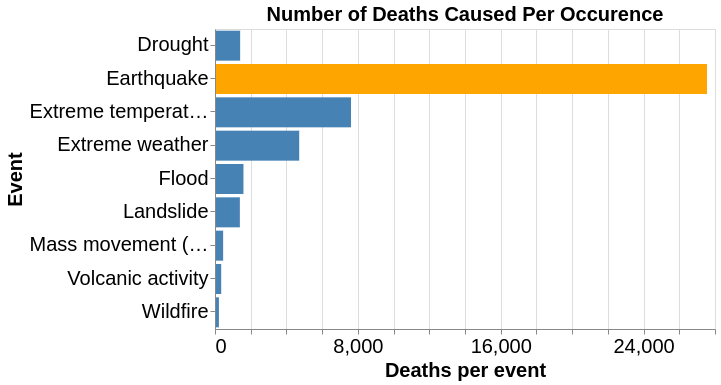

In [35]:
disasters_hist = alt.Chart(gd_filt).mark_bar().encode(
    alt.X('death_per_event', title = 'Deaths per event'),
    alt.Y('Entity',title = 'Event'),
    color=alt.condition(
        alt.datum.Entity == 'Earthquake',  
        alt.value('orange'),    
        alt.value('steelblue'),
        
    ),
    tooltip = alt.Tooltip(['death_per_event'],title = 'Deaths per Event')
).properties(height = 300, width = 500,title = 'Number of Deaths Caused Per Occurence')
disasters_hist.configure_axis(
    labelFontSize=20,
    titleFontSize=20
).configure_title(fontSize=20)

In [44]:
disasters_hist.configure_axis(
    labelFontSize=18,
    titleFontSize=18
).configure_title(fontSize=18).save('../charts/hist.html')

In [45]:
earth_data = pd.read_csv("../data/earthquake_data.csv")
earth_data.head()

,Country,Code,Year,Death_earthquake,Death_total
0,Afghanistan,AFG,1990,54,196064.098125
1,Afghanistan,AFG,1991,848,199867.866189
2,Afghanistan,AFG,1992,0,208838.902475
3,Afghanistan,AFG,1993,0,236647.093231
4,Afghanistan,AFG,1994,0,260216.187536


In [7]:
earth_data['Death Rate'] = (earth_data['Death_earthquake']/earth_data['Death_total'])*100

In [8]:
earth_data.head()

,Country,Code,Year,Death_earthquake,Death_total,Death Rate
0,Afghanistan,AFG,1990,54,196064.098125,0.027542
1,Afghanistan,AFG,1991,848,199867.866189,0.424280
2,Afghanistan,AFG,1992,0,208838.902475,0.000000
3,Afghanistan,AFG,1993,0,236647.093231,0.000000
4,Afghanistan,AFG,1994,0,260216.187536,0.000000


In [9]:
earth_gr = (earth_data.
            groupby('Year').
            sum().
            reset_index()
           )
earth_gr['Death Rate'] = np.round((earth_gr['Death_earthquake']/earth_gr['Death_total'])*100,4)
earth_gr

,Year,Death_earthquake,Death_total,Death Rate
0,1990,52945,3.797942e+07,0.1394
1,1991,4262,3.848211e+07,0.0111
2,1992,3987,3.869911e+07,0.0103
3,1993,11300,3.896423e+07,0.0290
4,1994,1447,3.959254e+07,0.0037
5,1995,5948,3.937374e+07,0.0151
6,1996,568,3.945258e+07,0.0014
7,1997,3216,3.980260e+07,0.0081
8,1998,9057,4.006258e+07,0.0226
9,1999,19657,4.021977e+07,0.0489


In [10]:
dr_plot = alt.Chart(earth_gr).mark_line(point = True).encode(
    alt.X('Year:O'),
    alt.Y('Death Rate:Q', title = 'Death Rate(%)'),
    tooltip = alt.Tooltip(['Death Rate','Year'])
    
).properties(title = "Number of deaths due to earthquake out of total deaths",height = 300, width = 500)

In [11]:
319319/4.253405e+07

0.007507373504286566

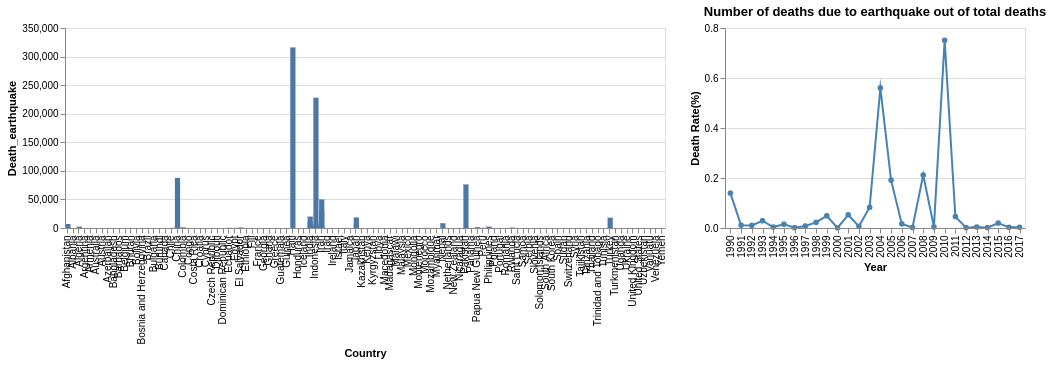

In [12]:
selection = alt.selection_single(fields = ['Year'])

dr_plot = alt.Chart(earth_gr).mark_line(point = True).encode(
    alt.X('Year:O'),
    alt.Y('Death Rate:Q', title = 'Death Rate(%)'),
    tooltip = alt.Tooltip(['Death Rate','Year']),
    color=alt.condition(selection, alt.value('steelblue'), alt.value('lightgray'))
    
).properties(title = "Number of deaths due to earthquake out of total deaths",height = 200, width = 300).add_selection(
    selection
)

dummy = alt.Chart(earth_gr).mark_point().encode(
    alt.X('Death Rate'),
    alt.Y('Death_earthquake')
).transform_filter(selection)

exp = alt.Chart(earth_data).mark_bar().encode(
    alt.X('Country'),
    alt.Y('Death_earthquake')
).transform_filter(selection).properties(height = 200,width = 600)

alt.concat(exp,dr_plot)


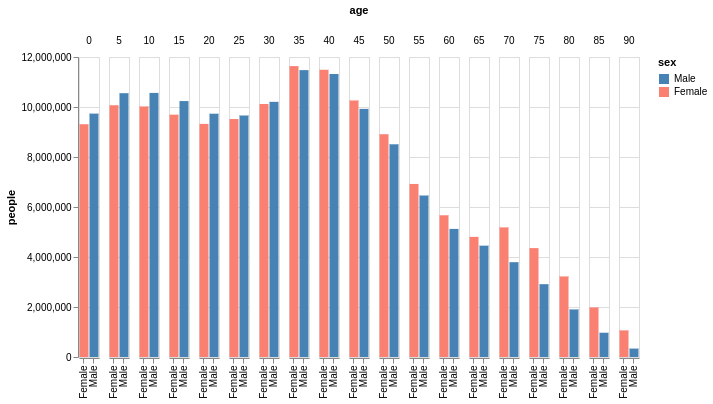

In [13]:
import altair as alt
from vega_datasets import data

source = data.population.url

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'], on='none',
                                   bind=slider, init={'year': 2000})

alt.Chart(source).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

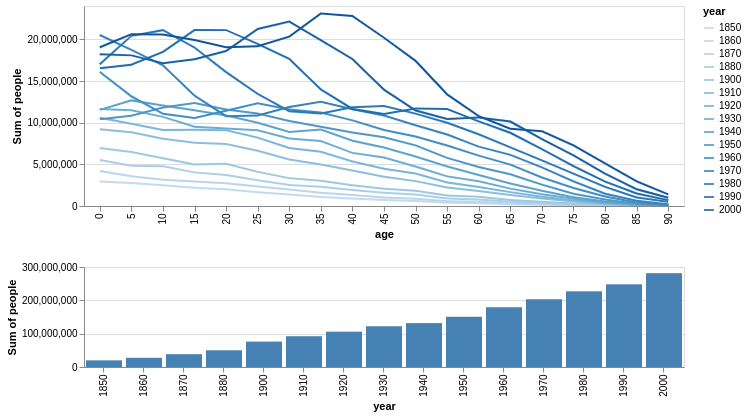

In [14]:
import altair as alt
from vega_datasets import data
pop = data.population()

selection = alt.selection_multi(fields=['year'])

top = alt.Chart(data=pop).mark_line().encode(
    x='age:O',
    y='sum(people):Q',
    color = 'year:O'
).properties(
    width=600, height=200
).transform_filter(
    selection
)

bottom = alt.Chart(data=pop).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color=alt.condition(selection, alt.value('steelblue'), alt.value('lightgray'))
).properties(
    width=600, height=100
).add_selection(
    selection
)

alt.vconcat(
    top, bottom
)

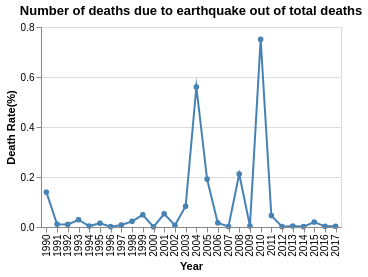

In [15]:
dr_plot

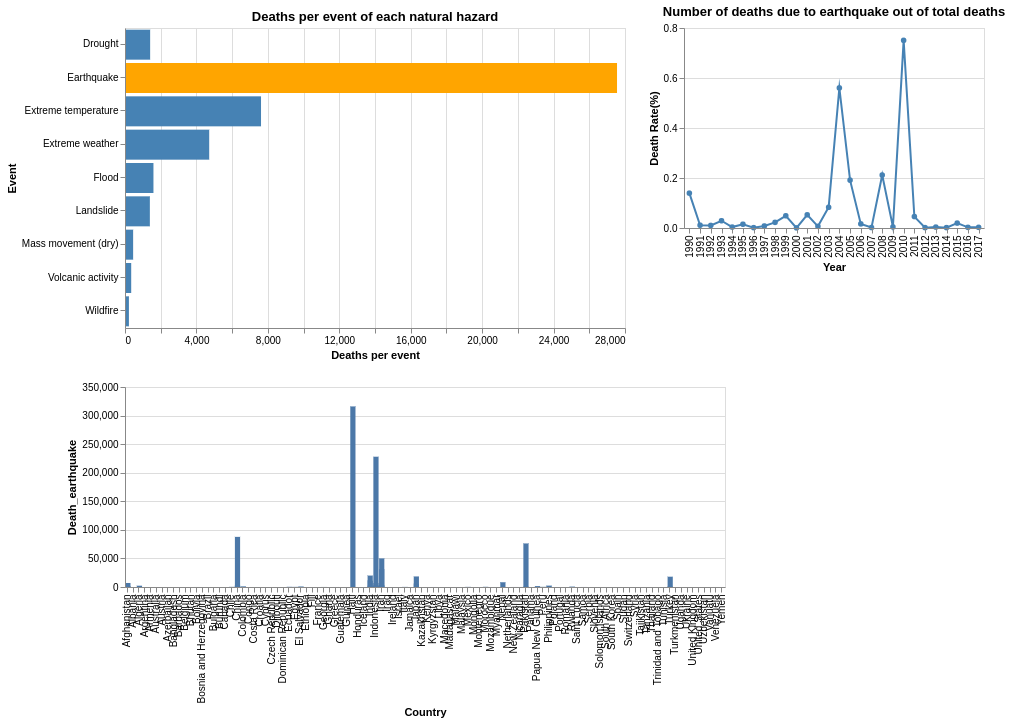

In [16]:
alt.vconcat(alt.concat(disasters_hist,dr_plot),exp)

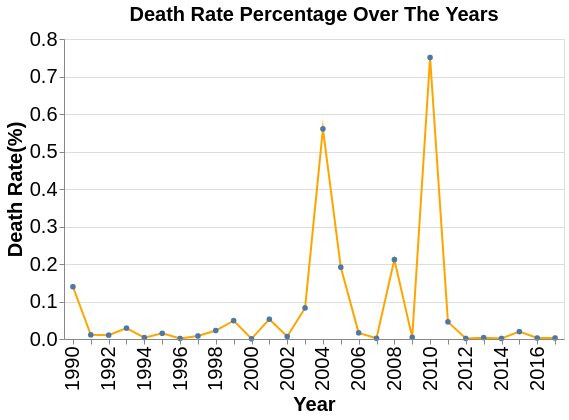

In [53]:


dr_plot = alt.Chart(earth_gr).mark_line(point = True, color = 'orange').encode(
    alt.X('Year:O'),
    alt.Y('Death Rate:Q', title = 'Death Rate(%)'),
    tooltip = alt.Tooltip(['Death Rate','Year'])
    
).properties(title = "Death Rate Percentage Over The Years",height = 300, width = 500)
dr_plot.configure_axis(
    labelFontSize=20,
    titleFontSize=20
).configure_title(fontSize=20)

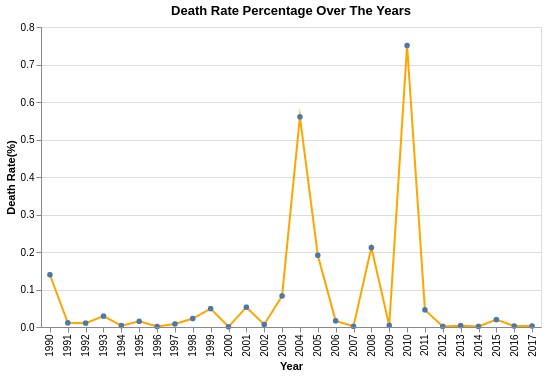

In [54]:
dr_plot

In [55]:
alt.hconcat(disasters_hist,dr_plot).configure_axis(
    labelFontSize=18,
    titleFontSize=18
).configure_title(fontSize=18).save('../charts/world_combined_plots.html')

In [56]:
dr_plot.configure_axis(
    labelFontSize=18,
    titleFontSize=18
).configure_title(fontSize=18).save('../charts/death_rate_vs_year.html')

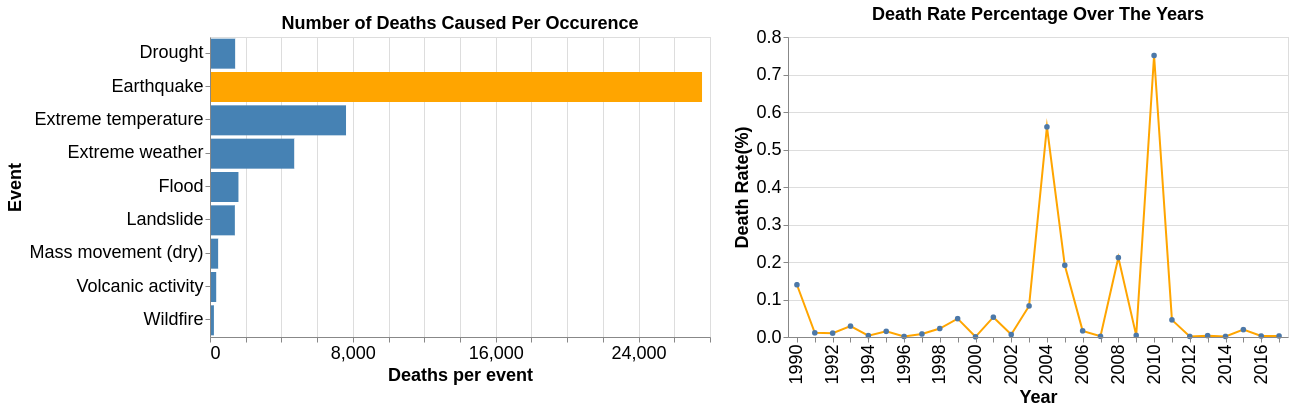

In [57]:
alt.hconcat(disasters_hist,dr_plot).configure_axis(
    labelFontSize=18,
    titleFontSize=18
).configure_title(fontSize=18)